In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import random
import pickle

In [ ]:
def show_image( image_data ): # Used for testing
  im = plt.imshow(image_data, cmap='Greys')
  plt.show()

In [ ]:
def dynamics(x_t, u_t): # Returns x_t+1
  A = np.array([[1.0, 1.0], [0.0, 1.0]])
  B = np.array([[0.0], [1.0]])
  Ax_t = np.matmul(A, x_t)
  Bu_t = B * u_t

  return np.add(Ax_t, Bu_t)

In [ ]:
def collect_data( x_t1, u_list, times, cur_list ): # Collects x's given x_t1, list of u_t, and number of times to calculate
    cur_x = x_t1
    x_list = [cur_x]
    for i in range(times):
        next_x = dynamics(cur_x, u_list[i])
        pos = next_x[0][0]

        if pos >= 99:
          next_x[0][0] = 99
          x_list.append(next_x)
          next_x[0][0] = random.randint(10, 90)
        elif pos < 0:
          next_x[0][0] = 0
          x_list.append(next_x)
          next_x[0][0] = random.randint(10, 90)
        else:
          x_list.append(next_x)
        cur_x = next_x

    cur_list += x_list

In [ ]:
def create_u_list( times ): # Creates list of u_t for testing given number of u's to create
    u_list = []
    for i in range(times):
        u = random.uniform(-1, 1)
        u_list.append(np.array([[u]]))

    return u_list

In [ ]:
def add_car( image_data, start_column, start_row ): # Adds car to image data
    color = .7 # Change color of the car body
    total_col, total_row = image_data.shape
    start_column = int(start_column)
    start_row = int(start_row)

    if start_row + 2 >= total_row:
        start_row = 97

    if start_row - 1 < 0:
        start_row = 1

    if start_column + 2 >= total_col:
        start_column = 94

    if start_column - 5 < 0:
        start_column = 5

    # Main body
    image_data[start_row: start_row + 2, start_column - 5: start_column + 5] = color
    image_data[start_row - 1, start_column - 3: start_column + 3] = color

    # Wheels
    image_data[start_row + 2, start_column - 3] = 1
    image_data[start_row + 2, start_column + 2] = 1

In [ ]:
def image_noise( image_data, scale ):
  for i in range(100):
    for j in range(100):
      image_data[i, j] += random.uniform(-scale, scale)

In [ ]:
def road_noise( image_data, scale ):
  for i in range(35, 65):
    for j in range(100):
      image_data[i, j] += random.uniform(-scale, scale)

In [ ]:
def top_grass_noise( image_data, scale ):
  for i in range(35):
    for j in range(100):
      image_data[i, j] += random.uniform(-scale, scale)

In [ ]:
def bottom_grass_noise( image_data, scale ):
  for i in range(65, 100):
    for j in range(100):
      image_data[i, j] += random.uniform(-scale, scale)

In [ ]:
def create_image():

  M = np.zeros((100,100))
  num_rows = np.shape(M)[0]
  num_columns = np.shape(M)[1]

  # create road and grass
  M[:35] = 0.05
  M[35: 65] = 0.3
  M[65: ] = 0.05
  for i in range(0, 100, 10):
    M[49: 52, i: i + 5] = 0

  # top rows
  for i in range(0, num_rows):
    M[0:3, i] = 0.4 * (random.randint(1, 2))

  # bottom rows
  for i in range(0, num_rows):
    M[num_rows - 3: num_rows, i] = 0.4 * (random.randint(1, 2))

  # left rows
  for i in range(0, num_columns):
    M[i, 0:3] = 0.4 * (random.randint(1, 2))

  # right rows
  for i in range(0, num_columns):
    M[i, num_columns - 3: num_columns] = 0.4 * (random.randint(1, 2))

  # random 7x7 blocks
  block_row_start = random.choice([random.randint(0, 28), random.randint(65, 92)])
  block_column_start = random.randint(0, 92)
  M[block_row_start: block_row_start + 7, block_column_start: block_column_start + 7] = 0.8

  # random trees
  for i in range(random.randint(20, 30)):
    block_row_start = random.choice([random.randint(0, 28), random.randint(65, 92)])
    block_column_start = random.randint(0, 92)
    M[block_row_start: block_row_start + 3, block_column_start: block_column_start + 3] = 0.1 * random.randint(3, 6)
    M[block_row_start + 3: block_row_start + 5, block_column_start + 1] = .7

  # sine pebbles
  pebble_start = random.randint(0, 80)
  for i in range(0, 100, 5):
    M[int(pebble_start * np.sin(i)), i] = .1 * random.randint(4, 6)

  return M

In [ ]:
# save as numpy array
# we need at least 100,000 images
# save the list as a pickle
# randomized image, but car's path has meaning

def generate_image_set( x_data ):
    file_name = "/content/car_images/Car{}.png"
    image_data = create_image()
    image_list = []

    for i in range(len(x_data)):

      image_data = create_image()
      temp_image = np.copy(image_data)

      car_column = int(x_data[i][0])
      car_row = random.randint(40, 60)
      add_car(temp_image, car_column, car_row)
      image_list.append(temp_image)

    return image_list

      # im = plt.imshow(temp_image, cmap='Greys')
      # plt.savefig(file_name.replace("{}", str(i)))

In [ ]:
from keras.models import load_model
model = load_model('FSRImodel2.h5')

In [ ]:
times = 49
total_image_factor = 10
u_list = create_u_list(times)
x_t1 = np.array([[0.],[1.]])
x_data = []

for i in range(total_image_factor):
  collect_data(x_t1, u_list, times, x_data)
  x_t1 = x_data[-1]

image_list = generate_image_set(x_data)

print(f"Total Images: {len(image_list)}")

#image_data = create_image()

Total Images: 500


In [ ]:
def calc_error( predict_list ):
  error_list = []
  for i in range(len(predict_list)):
    if i != 0:
      error_list.append((abs(predict_list[i] - x_data[i]) / x_data[i])[0][0])
  return sum(error_list) / len(predict_list)

In [ ]:
top_noise1 = np.copy(image_list)
for cur_image in top_noise1:
  top_grass_noise(cur_image, .01)

top_noise2 = np.copy(image_list)
for cur_image in top_noise2:
  top_grass_noise(cur_image, .05)

top_noise3 = np.copy(image_list)
for cur_image in top_noise3:
  top_grass_noise(cur_image, .1)

top_noise4 = np.copy(image_list)
for cur_image in top_noise4:
  top_grass_noise(cur_image, .2)

top_noise5 = np.copy(image_list)
for cur_image in top_noise5:
  top_grass_noise(cur_image, .5)

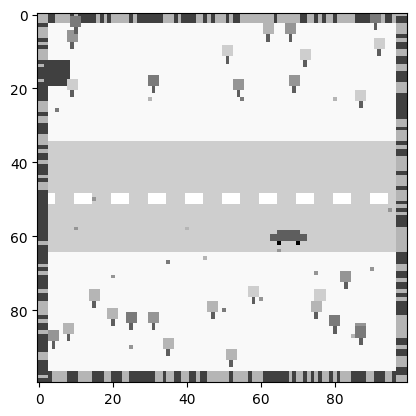

In [ ]:
im = plt.imshow(image_list[-1], cmap='Greys')
plt.show()

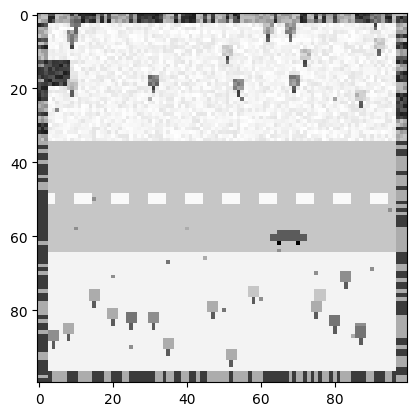

In [ ]:
im = plt.imshow(top_noise3[-1], cmap='Greys')
plt.show()

In [ ]:
top_predict1 = model.predict(top_noise1, batch_size= 10)
top_predict2 = model.predict(top_noise2, batch_size= 10)
top_predict3 = model.predict(top_noise3, batch_size= 10)
top_predict4 = model.predict(top_noise4, batch_size= 10)
top_predict5 = model.predict(top_noise5, batch_size= 10)

50/50 [==============================] - 2s 30ms/step


In [ ]:
print(top_predict5)

In [ ]:
top_data = [] # First graph- this is the thing to graph! Graph on y-axis, the x-axis will be the noise scaling increments (.01, .05, etc)

top_data.append(calc_error(top_predict1))
top_data.append(calc_error(top_predict2))
top_data.append(calc_error(top_predict3))
top_data.append(calc_error(top_predict4))
top_data.append(calc_error(top_predict5))
print(top_data)

[1.984871228130415, 2.0043219256765985, 2.0492231009498383, 2.155533439882152, 2.5071850969085054]


In [ ]:
road_noise1 = np.copy(image_list)
for cur_image in road_noise1:
  road_noise(cur_image, .01)

road_noise2 = np.copy(image_list)
for cur_image in road_noise2:
  road_noise(cur_image, .05)

road_noise3 = np.copy(image_list)
for cur_image in road_noise3:
  road_noise(cur_image, .1)

road_noise4 = np.copy(image_list)
for cur_image in road_noise4:
  road_noise(cur_image, .2)

road_noise5 = np.copy(image_list)
for cur_image in road_noise5:
  road_noise(cur_image, .5)

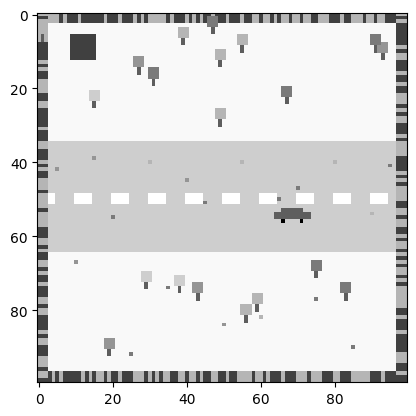

In [ ]:
im = plt.imshow(image_list[-4], cmap='Greys')
plt.show()

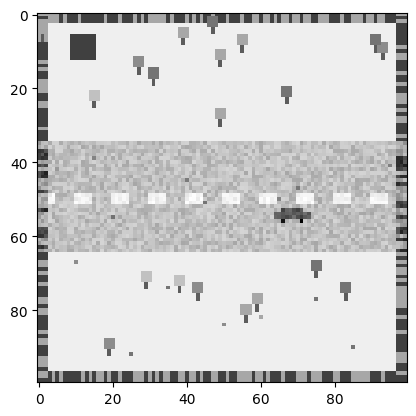

In [ ]:
im = plt.imshow(road_noise3[-4], cmap='Greys')
plt.show()

In [ ]:
road_predict1 = model.predict(road_noise1, batch_size= 10)
road_predict2 = model.predict(road_noise2, batch_size= 10)
road_predict3 = model.predict(road_noise3, batch_size= 10)
road_predict4 = model.predict(road_noise4, batch_size= 10)
road_predict5 = model.predict(road_noise5, batch_size= 10)

50/50 [==============================] - 3s 55ms/step


In [ ]:
road_data = [] # Second graph- this is the thing to graph! Graph on y-axis, the x-axis will be the noise scaling increments (.01, .05, etc)

road_data.append(calc_error(road_predict1))
road_data.append(calc_error(road_predict2))
road_data.append(calc_error(road_predict3))
road_data.append(calc_error(road_predict4))
road_data.append(calc_error(road_predict5))

print(road_data)

[1.985538992427838, 1.9960450715539964, 2.09656862022097, 2.3858035990438, 3.424882331897903]


In [ ]:
full_noise1 = np.copy(image_list)
for cur_image in full_noise1:
  image_noise(cur_image, .01)

full_noise2 = np.copy(image_list)
for cur_image in full_noise2:
  image_noise(cur_image, .05)

full_noise3 = np.copy(image_list)
for cur_image in full_noise3:
  image_noise(cur_image, .1)

full_noise4 = np.copy(image_list)
for cur_image in full_noise4:
  image_noise(cur_image, .2)

full_noise5 = np.copy(image_list)
for cur_image in full_noise5:
  image_noise(cur_image, .5)

In [ ]:
full_predict1 = model.predict(full_noise1, batch_size= 10)
full_predict2 = model.predict(full_noise2, batch_size= 10)
full_predict3 = model.predict(full_noise3, batch_size= 10)
full_predict4 = model.predict(full_noise4, batch_size= 10)
full_predict5 = model.predict(full_noise5, batch_size= 10)


50/50 [==============================] - 2s 30ms/step


In [ ]:
full_data = [] # Third graph- this is the thing to graph! Graph on y-axis, the x-axis will be the noise scaling increments (.01, .05, etc)

full_data.append(calc_error(full_predict1))
full_data.append(calc_error(full_predict2))
full_data.append(calc_error(full_predict3))
full_data.append(calc_error(full_predict4))
full_data.append(calc_error(full_predict5))

print(full_data)

[1.9939777833376204, 2.0618929506185677, 2.230891112587473, 2.631514360755797, 3.934690303599749]


In [ ]:
bottom_noise1 = np.copy(image_list)
for cur_image in bottom_noise1:
  bottom_grass_noise(cur_image, .01)

bottom_noise2 = np.copy(image_list)
for cur_image in bottom_noise2:
  bottom_grass_noise(cur_image, .05)

bottom_noise3 = np.copy(image_list)
for cur_image in bottom_noise3:
  bottom_grass_noise(cur_image, .1)

bottom_noise4 = np.copy(image_list)
for cur_image in bottom_noise4:
  bottom_grass_noise(cur_image, .2)

bottom_noise5 = np.copy(image_list)
for cur_image in bottom_noise5:
  bottom_grass_noise(cur_image, .5)

In [ ]:
bottom_predict1 = model.predict(bottom_noise1, batch_size= 10)
bottom_predict2 = model.predict(bottom_noise2, batch_size= 10)
bottom_predict3 = model.predict(bottom_noise3, batch_size= 10)
bottom_predict4 = model.predict(bottom_noise4, batch_size= 10)
bottom_predict5 = model.predict(bottom_noise5, batch_size= 10)

50/50 [==============================] - 2s 31ms/step


In [ ]:
bottom_data = [] # Fourth graph- this is the thing to graph! Graph on y-axis, the x-axis will be the noise scaling increments (.01, .05, etc)

bottom_data.append(calc_error(bottom_predict1))
bottom_data.append(calc_error(bottom_predict2))
bottom_data.append(calc_error(bottom_predict3))
bottom_data.append(calc_error(bottom_predict4))
bottom_data.append(calc_error(bottom_predict5))

print(full_data)

[1.9939777833376204, 2.0618929506185677, 2.230891112587473, 2.631514360755797, 3.934690303599749]


In [ ]:
baseline_predict = model.predict(np.copy(image_list), batch_size= 10)
baseline_val = calc_error(baseline_predict)


50/50 [==============================] - 2s 40ms/step


In [ ]:
baseline = [baseline_val, baseline_val, baseline_val, baseline_val, baseline_val]

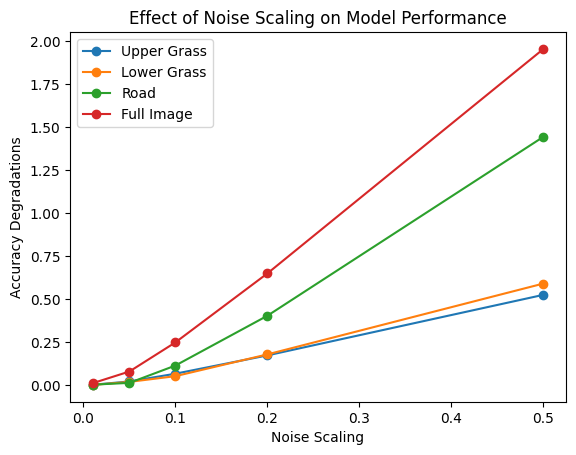

In [ ]:
X = [0.01, 0.05, 0.1, 0.2, 0.5]

#plt.plot(firstGraphX, firstGraphY, linestyle="-", marker="o")
# plt.plot(x, y, linestyle="-", marker="o", label="Expenses")
# plt.legend()
plt.xlabel("Noise Scaling")
plt.ylabel("Accuracy Degradations")
plt.title("Effect of Noise Scaling on Model Performance")
#print(np.array(top_data) - np.array(baseline))
#plt.semilogy(X, baseline, "r-", label="Baseline (no noise scaling)")
plt.plot(X, np.array(top_data) - np.array(baseline), linestyle="-", marker="o", label="Upper Grass")
plt.plot(X, np.array(bottom_data) - np.array(baseline), linestyle="-", marker="o", label="Lower Grass")
plt.plot(X, np.array(road_data) - np.array(baseline), linestyle="-", marker="o", label="Road")
plt.plot(X, np.array(full_data) - np.array(baseline), linestyle="-", marker="o", label="Full Image")
plt.legend()
plt.show()

In [ ]:
positions = []
for i in range(len(x_data)):
  positions.append(x_data[i][0][0])

print(type(positions))

<class 'list'>


In [ ]:
import keras
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
H = model.fit(road_noise2, np.array(positions), validation_data=(road_noise1, np.array(positions)), epochs=10, callbacks=[early_stopping])

Epoch 1/10
16/16 [==============================] - 15s 930ms/step - loss: 41.4624 - val_loss: 52.5431
Epoch 2/10
16/16 [==============================] - 8s 529ms/step - loss: 27.2183 - val_loss: 20.0961
Epoch 3/10
16/16 [==============================] - 7s 436ms/step - loss: 20.0722 - val_loss: 40.9159
Epoch 4/10
16/16 [==============================] - 8s 526ms/step - loss: 17.8890 - val_loss: 23.7018
Epoch 5/10
16/16 [==============================] - 7s 454ms/step - loss: 13.5759 - val_loss: 35.6629
Epoch 6/10
16/16 [==============================] - 8s 486ms/step - loss: 16.2700 - val_loss: 29.5272
Epoch 7/10
16/16 [==============================] - 8s 525ms/step - loss: 11.6946 - val_loss: 11.3224
Epoch 8/10
16/16 [==============================] - 7s 433ms/step - loss: 8.7628 - val_loss: 13.9888
Epoch 9/10
16/16 [==============================] - 8s 529ms/step - loss: 7.5037 - val_loss: 17.5906
Epoch 10/10
16/16 [==============================] - 8s 517ms/step - loss: 7.6876 -

In [ ]:
H = model.fit(road_noise3, np.array(positions), validation_data=(road_noise1, np.array(positions)), epochs=10, callbacks=[early_stopping])

Epoch 1/10
16/16 [==============================] - 13s 860ms/step - loss: 25.2310 - val_loss: 17.3660
Epoch 2/10
16/16 [==============================] - 7s 465ms/step - loss: 18.6458 - val_loss: 55.9538
Epoch 3/10
16/16 [==============================] - 11s 692ms/step - loss: 12.9063 - val_loss: 62.5368
Epoch 4/10
16/16 [==============================] - 9s 551ms/step - loss: 12.8419 - val_loss: 31.6963
Epoch 5/10
16/16 [==============================] - 9s 548ms/step - loss: 10.3729 - val_loss: 26.3691
Epoch 6/10
16/16 [==============================] - 9s 587ms/step - loss: 13.6246 - val_loss: 78.9781
Epoch 7/10
16/16 [==============================] - 10s 622ms/step - loss: 11.2982 - val_loss: 22.6424
Epoch 8/10
16/16 [==============================] - 13s 851ms/step - loss: 8.5007 - val_loss: 50.8616
Epoch 9/10
16/16 [==============================] - 10s 612ms/step - loss: 7.0783 - val_loss: 26.6863
Epoch 10/10
16/16 [==============================] - 9s 585ms/step - loss: 6.60

In [ ]:
H = model.fit(road_noise4, np.array(positions), validation_data=(road_noise1, np.array(positions)), epochs=10, callbacks=[early_stopping])

Epoch 1/10
16/16 [==============================] - 12s 698ms/step - loss: 130.0368 - val_loss: 63.9453
Epoch 2/10
16/16 [==============================] - 12s 742ms/step - loss: 51.8600 - val_loss: 148.2472
Epoch 3/10
16/16 [==============================] - 8s 536ms/step - loss: 30.8827 - val_loss: 203.2656
Epoch 4/10
16/16 [==============================] - 8s 527ms/step - loss: 24.1281 - val_loss: 118.6095
Epoch 5/10
16/16 [==============================] - 7s 452ms/step - loss: 17.6255 - val_loss: 122.1953
Epoch 6/10
16/16 [==============================] - 10s 633ms/step - loss: 15.2735 - val_loss: 157.6877
Epoch 7/10
16/16 [==============================] - 11s 716ms/step - loss: 14.4472 - val_loss: 97.3277
Epoch 8/10
16/16 [==============================] - 7s 460ms/step - loss: 12.3791 - val_loss: 96.6017
Epoch 9/10
16/16 [==============================] - 10s 652ms/step - loss: 10.7838 - val_loss: 100.6521
Epoch 10/10
16/16 [==============================] - 9s 545ms/step - l

In [ ]:
H = model.fit(road_noise5, np.array(positions), validation_data=(road_noise1, np.array(positions)), epochs=10, callbacks=[early_stopping])

Epoch 1/10
16/16 [==============================] - 10s 631ms/step - loss: 1564.6857 - val_loss: 1320.1138
Epoch 2/10
16/16 [==============================] - 10s 614ms/step - loss: 989.2261 - val_loss: 566.9326
Epoch 3/10
16/16 [==============================] - 8s 516ms/step - loss: 512.5962 - val_loss: 678.9178
Epoch 4/10
16/16 [==============================] - 8s 483ms/step - loss: 484.6122 - val_loss: 508.3275
Epoch 5/10
16/16 [==============================] - 7s 443ms/step - loss: 478.9318 - val_loss: 580.1146
Epoch 6/10
16/16 [==============================] - 8s 511ms/step - loss: 464.5948 - val_loss: 569.8837
Epoch 7/10
16/16 [==============================] - 7s 429ms/step - loss: 460.6920 - val_loss: 557.3602
Epoch 8/10
16/16 [==============================] - 8s 510ms/step - loss: 462.9996 - val_loss: 587.3394
Epoch 9/10
16/16 [==============================] - 8s 536ms/step - loss: 461.7143 - val_loss: 531.4052
Epoch 10/10
16/16 [==============================] - 8s 471m

In [ ]:
model.save("/content/FSRImodel3.h5")
print("Saved model to drive")

Saved model to drive


In [ ]:
times = 49
total_image_factor = 10
u_list = create_u_list(times)
x_t1 = np.array([[0.],[1.]])
x_data = []

for i in range(total_image_factor):
  collect_data(x_t1, u_list, times, x_data)
  x_t1 = x_data[-1]

image_list = generate_image_set(x_data)

print(f"Total Images: {len(image_list)}")

#image_data = create_image()

Total Images: 500


In [ ]:
top_noise1 = np.copy(image_list)
for cur_image in top_noise1:
  top_grass_noise(cur_image, .01)

top_noise2 = np.copy(image_list)
for cur_image in top_noise2:
  top_grass_noise(cur_image, .05)

top_noise3 = np.copy(image_list)
for cur_image in top_noise3:
  top_grass_noise(cur_image, .1)

top_noise4 = np.copy(image_list)
for cur_image in top_noise4:
  top_grass_noise(cur_image, .2)

top_noise5 = np.copy(image_list)
for cur_image in top_noise5:
  top_grass_noise(cur_image, .5)

In [ ]:
top_predict1 = model.predict(top_noise1, batch_size= 10)
top_predict2 = model.predict(top_noise2, batch_size= 10)
top_predict3 = model.predict(top_noise3, batch_size= 10)
top_predict4 = model.predict(top_noise4, batch_size= 10)
top_predict5 = model.predict(top_noise5, batch_size= 10)

50/50 [==============================] - 2s 31ms/step


In [ ]:
top_data = [] # First graph- this is the thing to graph! Graph on y-axis, the x-axis will be the noise scaling increments (.01, .05, etc)

top_data.append(calc_error(top_predict1))
top_data.append(calc_error(top_predict2))
top_data.append(calc_error(top_predict3))
top_data.append(calc_error(top_predict4))
top_data.append(calc_error(top_predict5))
print(top_data)

[0.7084735856857765, 0.7075810206563656, 0.7061901542569791, 0.7027890180898217, 0.6921344368002235]


In [ ]:
road_noise1 = np.copy(image_list)
for cur_image in road_noise1:
  road_noise(cur_image, .01)

road_noise2 = np.copy(image_list)
for cur_image in road_noise2:
  road_noise(cur_image, .05)

road_noise3 = np.copy(image_list)
for cur_image in road_noise3:
  road_noise(cur_image, .1)

road_noise4 = np.copy(image_list)
for cur_image in road_noise4:
  road_noise(cur_image, .2)

road_noise5 = np.copy(image_list)
for cur_image in road_noise5:
  road_noise(cur_image, .5)

In [ ]:
road_predict1 = model.predict(road_noise1, batch_size= 10)
road_predict2 = model.predict(road_noise2, batch_size= 10)
road_predict3 = model.predict(road_noise3, batch_size= 10)
road_predict4 = model.predict(road_noise4, batch_size= 10)
road_predict5 = model.predict(road_noise5, batch_size= 10)

50/50 [==============================] - 2s 43ms/step


In [ ]:
road_data = [] # Second graph- this is the thing to graph! Graph on y-axis, the x-axis will be the noise scaling increments (.01, .05, etc)

road_data.append(calc_error(road_predict1))
road_data.append(calc_error(road_predict2))
road_data.append(calc_error(road_predict3))
road_data.append(calc_error(road_predict4))
road_data.append(calc_error(road_predict5))

print(road_data)

[0.7081891163706518, 0.7063633362941312, 0.7030095921507603, 0.6956348646136985, 0.6671567505447292]


In [ ]:
full_noise1 = np.copy(image_list)
for cur_image in full_noise1:
  image_noise(cur_image, .01)

full_noise2 = np.copy(image_list)
for cur_image in full_noise2:
  image_noise(cur_image, .05)

full_noise3 = np.copy(image_list)
for cur_image in full_noise3:
  image_noise(cur_image, .1)

full_noise4 = np.copy(image_list)
for cur_image in full_noise4:
  image_noise(cur_image, .2)

full_noise5 = np.copy(image_list)
for cur_image in full_noise5:
  image_noise(cur_image, .5)

In [ ]:
full_predict1 = model.predict(full_noise1, batch_size= 10)
full_predict2 = model.predict(full_noise2, batch_size= 10)
full_predict3 = model.predict(full_noise3, batch_size= 10)
full_predict4 = model.predict(full_noise4, batch_size= 10)
full_predict5 = model.predict(full_noise5, batch_size= 10)

50/50 [==============================] - 2s 39ms/step


In [ ]:
full_data = [] # Third graph- this is the thing to graph! Graph on y-axis, the x-axis will be the noise scaling increments (.01, .05, etc)

full_data.append(calc_error(full_predict1))
full_data.append(calc_error(full_predict2))
full_data.append(calc_error(full_predict3))
full_data.append(calc_error(full_predict4))
full_data.append(calc_error(full_predict5))

print(full_data)

[0.7078219014518838, 0.7042037260556752, 0.6990509786353711, 0.6861115182534636, 0.6595781417342137]


In [ ]:
bottom_noise1 = np.copy(image_list)
for cur_image in bottom_noise1:
  bottom_grass_noise(cur_image, .01)

bottom_noise2 = np.copy(image_list)
for cur_image in bottom_noise2:
  bottom_grass_noise(cur_image, .05)

bottom_noise3 = np.copy(image_list)
for cur_image in bottom_noise3:
  bottom_grass_noise(cur_image, .1)

bottom_noise4 = np.copy(image_list)
for cur_image in bottom_noise4:
  bottom_grass_noise(cur_image, .2)

bottom_noise5 = np.copy(image_list)
for cur_image in bottom_noise5:
  bottom_grass_noise(cur_image, .5)

In [ ]:
bottom_predict1 = model.predict(bottom_noise1, batch_size= 10)
bottom_predict2 = model.predict(bottom_noise2, batch_size= 10)
bottom_predict3 = model.predict(bottom_noise3, batch_size= 10)
bottom_predict4 = model.predict(bottom_noise4, batch_size= 10)
bottom_predict5 = model.predict(bottom_noise5, batch_size= 10)

50/50 [==============================] - 2s 31ms/step


In [ ]:
bottom_data = [] # Fourth graph- this is the thing to graph! Graph on y-axis, the x-axis will be the noise scaling increments (.01, .05, etc)

bottom_data.append(calc_error(bottom_predict1))
bottom_data.append(calc_error(bottom_predict2))
bottom_data.append(calc_error(bottom_predict3))
bottom_data.append(calc_error(bottom_predict4))
bottom_data.append(calc_error(bottom_predict5))

print(full_data)

[0.7078219014518838, 0.7042037260556752, 0.6990509786353711, 0.6861115182534636, 0.6595781417342137]


In [ ]:
baseline_predict = model.predict(np.copy(image_list), batch_size= 10)
baseline_val = calc_error(baseline_predict)
baseline = [baseline_val, baseline_val, baseline_val, baseline_val, baseline_val]

50/50 [==============================] - 2s 32ms/step


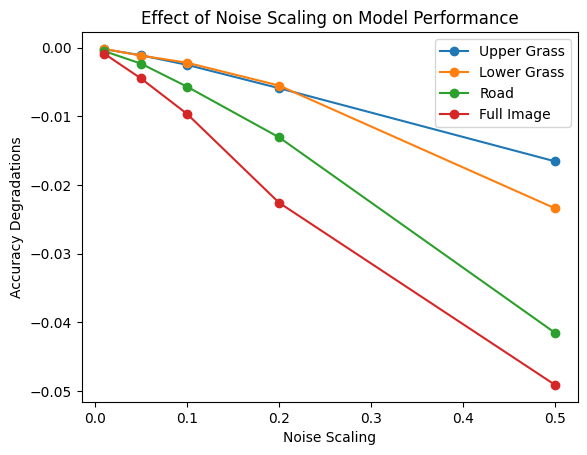

In [ ]:
X = [0.01, 0.05, 0.1, 0.2, 0.5]

#plt.plot(firstGraphX, firstGraphY, linestyle="-", marker="o")
# plt.plot(x, y, linestyle="-", marker="o", label="Expenses")
# plt.legend()
plt.xlabel("Noise Scaling")
plt.ylabel("Accuracy Degradations")
plt.title("Effect of Noise Scaling on Model Performance")
#print(np.array(top_data) - np.array(baseline))
#plt.semilogy(X, baseline, "r-", label="Baseline (no noise scaling)")
plt.plot(X, np.array(top_data) - np.array(baseline), linestyle="-", marker="o", label="Upper Grass")
plt.plot(X, np.array(bottom_data) - np.array(baseline), linestyle="-", marker="o", label="Lower Grass")
plt.plot(X, np.array(road_data) - np.array(baseline), linestyle="-", marker="o", label="Road")
plt.plot(X, np.array(full_data) - np.array(baseline), linestyle="-", marker="o", label="Full Image")
plt.legend()
plt.show()

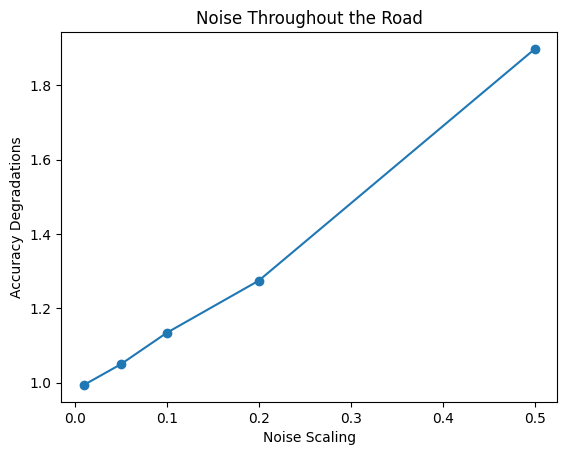

In [ ]:
secondGraphX = [0.01, 0.05, 0.1, 0.2, 0.5]
secondGraphY = road_data

plt.plot(secondGraphX, secondGraphY, linestyle="-", marker="o")
# plt.plot(x, y, linestyle="-", marker="o", label="Expenses")
# plt.legend()
plt.xlabel("Noise Scaling")
plt.ylabel("Accuracy Degradations")
plt.title("Noise Throughout the Road")
plt.show()

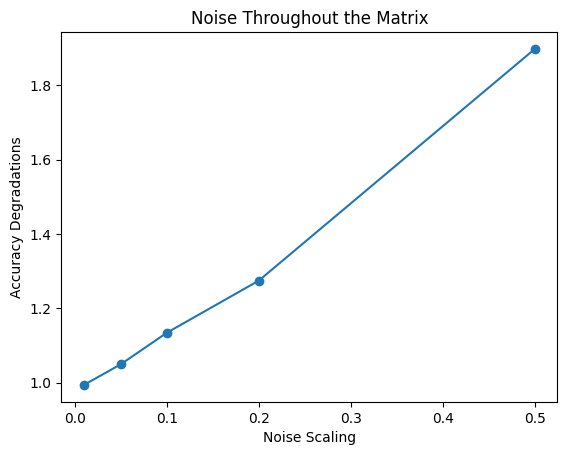

In [ ]:
thirdGraphX = [0.01, 0.05, 0.1, 0.2, 0.5]
thirdGraphY = full_data

plt.plot(secondGraphX, secondGraphY, linestyle="-", marker="o")
# plt.plot(x, y, linestyle="-", marker="o", label="Expenses")
# plt.legend()
plt.xlabel("Noise Scaling")
plt.ylabel("Accuracy Degradations")
plt.title("Noise Throughout the Matrix")
plt.show()

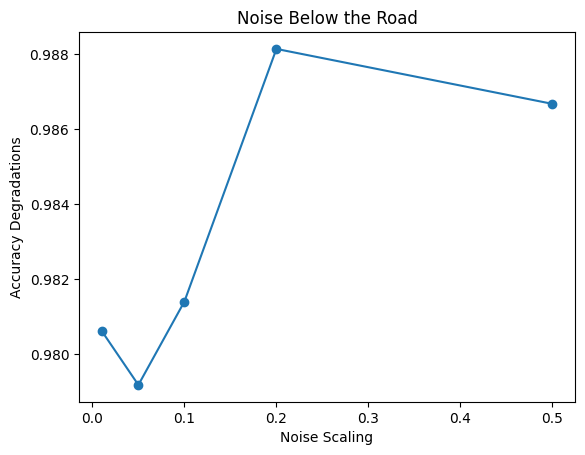

In [ ]:
fourthGraphX = [0.01, 0.05, 0.1, 0.2, 0.5]
fourthGraphY = bottom_data

plt.plot(fourthGraphX, fourthGraphY, linestyle="-", marker="o")
# plt.plot(x, y, linestyle="-", marker="o", label="Expenses")
# plt.legend()
plt.xlabel("Noise Scaling")
plt.ylabel("Accuracy Degradations")
plt.title("Noise Below the Road")
plt.show()